## Lateral induction between growing cells in a density gradient

### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.integrate as sint
from scipy.spatial import Voronoi

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
%load_ext blackcellmagic

#### Define functions for DDE integration

In [3]:
import os

# Set directory
dir_name = "plots"

In [4]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


__Define RHS function(s)__

In [274]:
def tc_rhs_beta_g_varAdj(S, S_delay, sender_idx, beta_func, beta_args, alpha, k, p, delta, lambda_, g, rho, Adj):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [314]:
t_to_days = lambda t: t / 7.28398176e-01   # time in days, based on growth rate of untreated strain

__Compute cell adjacancy matrices__

In [275]:
# from scipy.sparse import csr_matrix, diags, identity
# import scipy.stats

# def height_norm(X, A, dtype=np.float32):
#     """
#     Calculates the approprate `height` argument for `nw_Adj()`
#     given cell (node) coordinates `X` and k-step adjacency 
#     matrix `A` at a density of `rho = 1`.
#     """
    
#     # Get indices of adjacent nodes
#     w_idx = np.array(A.nonzero())
    
#     # Remove lower triangular indices
#     w_idx = w_idx[:, w_idx[1] > w_idx[0]]
    
#     # Get distance between adjacent nodes
#     d_vals = np.linalg.norm(X[w_idx[1]] - X[w_idx[0]], axis=1)
    
#     # Remove node-node connections outside interaction radius
#     d_mask = d_vals < irad
#     w_idx, d_vals = w_idx[:, d_mask], d_vals[d_mask]

#     # Get probability density at each distance
#     w_vals = scipy.stats.norm.pdf(d_vals).astype(dtype)
    
#     # Get row index of each weight in symmetric matrix
#     row_idx = w_idx.flatten()
    
#     # Get value for each weight in symmmetric matrix
#     row_vals = np.concatenate((w_vals, w_vals))
    
#     # Calculate sum of entries in each row
#     all_rows = np.arange(A.shape[0])
#     rowsum = np.bincount(np.searchsorted(all_rows, row_idx), row_vals)
    
#     # Set scaling factor such that mean row-sum is 1
#     return 1 / rowsum.mean()

In [276]:
# from scipy.sparse import csr_matrix, diags, identity
# import scipy.stats

# def k_step_Adj(k, rows, cols=0, dtype=np.float32, row_stoch=False, **kwargs):
#     """
#     """
    
#     if not cols:
#         cols = rows
        
#     # Construct adjacency matrix
#     a = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
    
#     # Add self-edges
#     n = rows * cols
#     eye = identity(n).astype(dtype)
#     A = (a + eye)
    
#     # Compute number of paths of length k between nodes
#     A = A ** k
    
#     # Store as 0. or 1.
#     A = (A > 0).astype(dtype)
    
#     # Remove self-edges
#     A = A - diags(A.diagonal())
    
#     if row_stoch:
#         rowsum = np.sum(A, axis=1)
#         A = csr_matrix(A / rowsum)
    
#     return A

In [277]:
# from scipy.sparse import csr_matrix, diags, identity
# import scipy.stats

# def nw_Adj(X, A, irad, width, height=1., row_stoch=False, rowsum_ceil=None, dtype=np.float32):
#     """
#     Compute the Normal-weighted neighborhood matrix. 
    
#     X  :  n x 2  array
#         Coordinates of graph nodes (cell centers)
        
#     A  :  n x n  Compressed Sparse Row (CSR) matrix
#         Neighborhood graph. Nonzero entries are 
#         used to compute pairwise distances.
    
#     irad  :  float
#         Distance cutoff. if node-node distance `d > irad`, 
#         nodes are not adjacent.
    
#     width  :  float
#         Used to calculate weights from distance. Standard 
#         deviation of the Normal distribution centered at zero.

#     height  :  float
#         Used to calculate weights from distance. Multiplied
#         by the probability density from the Normal distribution.
#         At a density of 1, the mean of the sum of weights in 
#         each row of the weighted adjacency should equal 1. 
    
#     """
    
#     # Get indices of adjacent nodes
#     w_idx = np.array(A.nonzero())
    
#     # Remove lower triangular indices
#     w_idx = w_idx[:, w_idx[1] > w_idx[0]]
    
#     # Get distance between adjacent nodes
#     d_vals = np.linalg.norm(X[w_idx[1]] - X[w_idx[0]], axis=1)
    
#     # Remove node-node connections outside interaction radius
#     d_mask = d_vals < irad
#     w_idx, d_vals = w_idx[:, d_mask], d_vals[d_mask]
    
#     # Get rescaled probability density at each distance
#     w_vals = height * scipy.stats.norm.pdf(d_vals, scale=width).astype(dtype)
    
#     # Make sparse matrix of weighted adjacency
#     W = csr_matrix((w_vals, (*w_idx,)), shape=A.shape)
    
#     # Add lower triangular values to make symmetric
#     W = W + W.T
    
#     # Normalize to row-stochastic form
#     if row_stoch:
        
#         # Get sum of entries in each row
#         rowsum = np.squeeze(np.asarray(np.sum(W, axis=1)))
        
#         # Calculate pseudo-inverse of rowsums
#         rs_mask = rowsum > 0
#         pinv_rowsum = rowsum.copy()
#         pinv_rowsum[rs_mask] = 1 / rowsum[rs_mask]
        
#         # Divide entries in W by their rowsum, ignoring 
#         #   empty rows.
#         A = diags(pinv_rowsum) @ W
    
#     # Enforce a ceiling on the rowsum by rescaling
#     if rowsum_ceil is not None:
        
#         assert not row_stoch, (
#             "Cannot set row_stoch=True and use rowsum_ceil."
#         )
        
#         # Get sum of entries in each row
#         rowsum = np.squeeze(np.asarray(np.sum(W, axis=1)))
        
#         # Get any rows with sum greater than ceiling
#         rs_mask = rowsum > rowsum_ceil
#         ceil_rowsum = np.ones(A.shape[0])
#         ceil_rowsum[rs_mask] = 1 / rowsum[rs_mask]
        
#         # Divide entries in W by their rowsum, ignoring 
#         #   empty rows.
#         A = diags(ceil_rowsum) @ W
    
#     return A

In [278]:
from scipy.sparse import csr_matrix, diags, identity
import scipy.stats

def k_step_Adj2(k, rows, cols=0, dtype=int, row_stoch=False, **kwargs):
    """
    """
    
    if not cols:
        cols = rows
        
    # Construct adjacency matrix
    A = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
    
    # Add self-edges
    n = rows * cols
    eye = identity(n).astype(dtype)
    a = (A + eye)
    
    for p in np.arange(k, 0, -1):
        # Compute number of paths of length p between nodes
        A[a ** p > 0] = p
    
    return (A - diags(A.diagonal())).astype(dtype)

In [279]:
from scipy.sparse import csr_matrix, diags, identity, triu
import scipy.stats

def get_weighted_Adj_t(X_t, A, weights, bin_edges, progress_bar=True, **kwargs):
    """
    
    """
    
    assert bin_edges.size + 1 == weights.size, (
        "Number of distance bin edges should be 1 less than number of supplied weights"
    )

    # Get number of time-steps and nodes
    nt, n, *_ = X_t.shape
    
    # Get indices of adjacent nodes, removing duplicates
    pw_idx_ks = [np.array(triu(A == p).nonzero()) for p in range(1, A.max() + 1)]
    
    iterator = np.arange(nt)
    if progress_bar:
        iterator = tqdm(iterator)
    
    W_t = []
    for i in iterator:
        W = weighted_Adj(X_t[i], pw_idx_ks, weights, bin_edges, n, **kwargs)
        W_t.append(W)
    
    return W_t



def weighted_Adj(X, pw_idx_ks, weights, bin_edges, n, row_stoch=False, rowsum_ceil=None, dtype=np.float32):
    """
    Compute the Normal-weighted neighborhood matrix. 
    
    X  :  n x 2  array
        Coordinates of graph nodes (cell centers)
        
    A  :  n x n  Compressed Sparse Row (CSR) matrix
        Neighborhood graph. Nonzero entries are 
        used to compute pairwise distances.
    
    irad  :  float
        Distance cutoff. if node-node distance `d > irad`, 
        nodes are not adjacent.
    
    width  :  float
        Used to calculate weights from distance. Standard 
        deviation of the Normal distribution centered at zero.

    height  :  float
        Used to calculate weights from distance. Multiplied
        by the probability density from the Normal distribution.
        At a density of 1, the mean of the sum of weights in 
        each row of the weighted adjacency should equal 1. 
    
    """
    
    w_vals_p = []
    
    for p in np.arange(1, ks + 1):
        
        # Select nodes that are `p` steps apart
        ## Note: `p` is 1-indexed, while arrays are 0-indexed
        pw_idx_p = pw_idx_ks[p - 1]
        
        # Get distance between nodes
        d_vals = np.linalg.norm(X[pw_idx_p[1]] - X[pw_idx_p[0]], axis=1)

        # Categorize node-node pairs into distance bins based on pairwise distance
        d_bins = np.searchsorted(bin_edges, d_vals)
        
        # Nodes cannot occupy a bin closer than `p`
        d_bins = np.maximum(d_bins, p - 1)
        
        # Assign weights and append to list
        w_vals_p.append(weights[d_bins])
    
    # Compile indices and weights
    pw_idx = np.hstack(pw_idx_ks)
    w_vals = np.concatenate(w_vals_p)
    
    # Make sparse matrix of weighted adjacency
    W = csr_matrix((w_vals, (*pw_idx,)), shape=(n,n))
    
    # Add lower triangular values to make symmetric
    W = W + W.T
    
    # Normalize to row-stochastic form
    if row_stoch:
        
        # Get sum of entries in each row
        rowsum = np.squeeze(np.asarray(np.sum(W, axis=1)))
        
        # Calculate pseudo-inverse of rowsums
        rs_mask = rowsum > 0
        pinv_rowsum = rowsum.copy()
        pinv_rowsum[rs_mask] = 1 / rowsum[rs_mask]
        
        # Divide entries in W by their rowsum, ignoring 
        #   empty rows.
        A = diags(pinv_rowsum).dot(W)
    
    # Enforce a ceiling on the rowsum by rescaling
    if rowsum_ceil is not None:
        
        assert not row_stoch, (
            "Cannot set row_stoch=True and use rowsum_ceil."
        )
        
        # Get sum of entries in each row
        rowsum = np.squeeze(np.asarray(np.sum(W, axis=1)))
        
        # Get any rows with sum greater than ceiling
        rs_mask = rowsum > rowsum_ceil
        ceil_rowsum = np.ones(A.shape[0])
        ceil_rowsum[rs_mask] = 1 / rowsum[rs_mask]
        
        # Divide entries in W by their rowsum, ignoring 
        #   empty rows.
        A = diags(ceil_rowsum).dot(W)
    
    return W

<hr>

## Generate all figures for a trial set of parameters 

In [280]:
# Set  name of trial
trial_name = "lowcis_expbeta"

# Random seed
seed = 2021

__Set growth min and max__

In [763]:
# Set min and max density
rho_min, rho_max = 1, 5.63040245

__Set RHS of dynamical equation__

In [764]:
# Set the RHS function in long-form
rhs_long = tc_rhs_beta_g_varAdj

# Set beta(rho)
beta_func = lsig.beta_rho_exp

__Set parameters for DDE integration__

In [765]:
# Get trial parameters
params_df = pd.read_csv("parameters_" + trial_name + ".csv")

In [766]:
# Get any arguments for beta function
is_beta_arg = [p.startswith("beta_") for p in params_df["parameter"].values]
beta_args   = params_df.value.values[is_beta_arg]

# Get the delay parameter
is_delay    = [p == "delay" for p in params_df["parameter"].values]
delay       = params_df.value.values[is_delay][0]

# Package all other parameters 
is_param    = [not (ba or d) for ba, d in zip(is_beta_arg, is_delay)]
param_names = params_df.parameter.values[is_param]
param_vals  = params_df.value.values[is_param]

# Package arguments for lsig.integrate_DDE and 
#   lsig.integrate_DDE_varargs. Density param is 
#   initialized with rho_min.
dde_args = *param_vals, rho_min

__Set cell-cell distance and interaction radius__

In [976]:
# cell-cell distance (dimensionless)
r = 1.   

# # maximum interaction radius in cell-lengths 
# irad = 3 * r + 0.05

# # Maximum number of steps for pairwise interaction in cell graph
# ksint(irad)
ks = 3

<hr>

## Modeling contact-dependent signaling under a density gradient

In [977]:
@numba.njit
def rho_y_t(y, t, psi, y_k, rho_bar, rho_max):
    """
    Density of a deforming lattice over time.
    Initial condition is an exponential gradient, and growth
    follows the logistic equation.
    """
    rho_0 = rho_bar * psi * np.log(psi) / (psi - 1)
    a = np.log(psi) / y_k
    rho_y_0 = rho_0 * np.exp(-a * y)
    return rho_max * rho_y_0 * np.exp(t) / (rho_max + rho_y_0 * (np.exp(t) - 1))
    
@numba.njit
def r_y_t(y, t, psi, y_k, rho_bar, rho_max):
    """
    Cell-cell distance on a deforming lattice over time.
    Initial condition is an exponential gradient, and growth
    follows the logistic equation.
    """
    rhoyt=rho_y_t(y, t, psi, y_k, rho_bar, rho_max)
    return r0/np.sqrt(rhoyt)
    

### Set growth parameters

In [1090]:
# Set lattice size
y_k = 150

# Set density at y=0, t=0
psi = 7

# Set average density at time 0 over interval y=[0, y_k]
rho_bar = 2

# Set density at saturation
rho_max = 5.63040245

#### Calculating cell locations

In [1091]:
# Set hex lattice dimensions
rows = cols = int(y_k * 2 / np.sqrt(3) / r) + 1

# Get cell coordinates and # cells
X = lsig.hex_grid(rows, cols, r=r).astype(np.float32)
n = X.shape[0]

# Make y-coordinates non-negative
refx = (cols // 2) * rows + 0
X = X - X[refx]

__Get `ks`-steps cell adjacency matrix__ 

In [1092]:
# Calculate whether cells i and j are within ks 
#   steps of each other on the cell graph
# ksAdj = k_step_Adj(ks, rows, cols)
ksAdj2 = k_step_Adj2(ks, rows, cols)

C:\Users\Pranav\Anaconda3\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [1093]:
# Get cells in the upper and lower `kn` rows
lower_border = np.arange(0, n, rows)
upper_border = lower_border + rows - 1
lower = np.concatenate([lower_border + p for p in range(ks)])
upper = np.concatenate([upper_border - p for p in range(ks)])

# Remove periodic boundaries
for i in lower:
    ksAdj2[i,upper]=0

In [1094]:
# # Get adjacency using Gaussian assumption
# gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

__Set time parameters__

In [1095]:
# Total time
tmax = 4

# Num steps per time-unit
nt_t = 100

# total num steps
nt = int(nt_t * tmax + 1)

# Time-span
t = np.linspace(0, tmax, nt, dtype=np.float32)

__Calculate density over space and time__

In [1096]:
# Set y-values to visualize
ny_ = 100
y_space = np.linspace(0, y_k, ny_)

# Set time-points to visualize
nt_ = 6
t_space_ = np.linspace(0, tmax, nt_)

# Calculate density 
dens_yt = rho_y_t(
    np.tile(y_space, nt_), 
    np.repeat(t_space_, ny_), 
    psi, 
    y_k, 
    rho_bar,
    rho_max,
).reshape(nt_, ny_)

__Plot density curves__

:NdOverlay   [simulation time]
   :Curve   [position]   (density,simulation time)
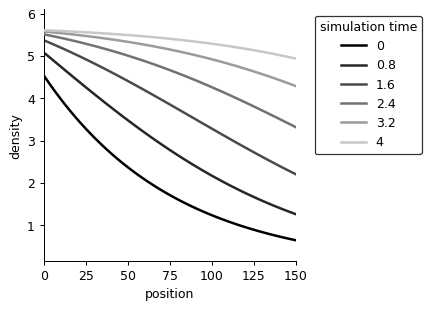

In [1097]:
%%capture --no-display

# Convert to DataFrame
data=pd.DataFrame({
    "position"       : np.tile(y_space, nt_),
    "simulation time": np.repeat(t_space_, ny_),
    "density"        : dens_yt.flatten(),
})

# Set color cycle
cycle = lsig.sample_cycle(cc.b_linear_grey_0_100_c0[:-50], nt_)

# Plot 
plt = hv.Curve(
    data=data,
    kdims=["position"], 
    vdims=["density", "simulation time"]
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(plt, dpi=90)

__Map cell locations under a substrate deformation__

In [1098]:
# Get density of each cell over time
rho_t = np.array([rho_y_t(X[:rows, 1], t_, psi, y_k, rho_bar, rho_max) for t_ in t])
rho_t = np.tile(rho_t, cols)

In [1099]:
# Distance between rows of a hexagonal lattice
dy = r * np.sqrt(3)/2

# Initialize mapping
ymap_t = np.zeros((nt, rows))
ryt = np.zeros((nt, rows))
for i, t_ in enumerate(t):
    
    # Get cell-cell distance over y
    rhoyt = rho_y_t(np.arange(rows) * dy, t_, psi, y_k, rho_bar, rho_max)
    ryt[i] = r/np.sqrt(rhoyt)
    
    # Approximate mapped y-coordinates
    ymap = sint.cumtrapz(ryt[i], dx=dy)
    ymap_t[i, 1:rows] = ymap

# Get mapped xy-coordinates
X_t = np.empty((nt, n, 2))
X_t[:, :, 0] = X[:, 0] * np.tile(ryt, (1, cols))
X_t[:, :, 1] = np.tile(ymap_t, (1, cols))

__Calculate cell-cell interactions over time__

In [1100]:
# Set cutoffs for distance bins
bin_edges = r * np.array([1.05, 2.05, 3.05])
# bin_edges = r * np.array([1.05,])

# Generate weights
unnorm_weights = np.zeros(ks + 1, dtype=np.float32)
unnorm_weights[:ks] = scipy.stats.norm.pdf(bin_edges, scale = r)

# Get the number of neighbors at path-length `p`
nn_p = 6 * (1 + np.arange(ks + 1))
weights = unnorm_weights / np.dot(unnorm_weights, nn_p)

In [1101]:
print(bin_edges)
print(weights)

[1.05 2.05 3.05]
[0.11305459 0.02399561 0.00187362 0.        ]


In [1102]:
progress_bar = True

W_t = get_weighted_Adj_t(X_t, ksAdj2, weights, bin_edges, progress_bar)
W_t = np.array(W_t)

100%|██████████| 401/401 [00:48<00:00,  8.30it/s]


In [1103]:
# # Get scaling for weights
# height = height_norm(X, ksAdj)

# # Progress bar
# progress_bar = True

# iterator = X_t
# if progress_bar:
#     iterator = tqdm(iterator)

# # Calculate cell-cell weight matrix at each time
# wA_t = []
# for x in iterator:
#     wa = nw_Adj(x, ksAdj, irad, width=irad/3, height=height, rowsum_ceil=1.)
#     wA_t.append(wa)

# wA_t = np.array(wA_t)

__Visualize signaling input to each cell__

In [1104]:
# Plot s-bar for each cell vs. position

def plot_s_bar(time_idx):
    
    # Calculate s-bar
    s_bar = beta_func(rho_t[time_idx], *beta_args) * (W_t[time_idx] @ np.ones(n))
    
    # Plot
    plt_sb = hv.Points(
        (X[:, 1], s_bar)
    ).opts(
        s=2,
        xlim=(0, y_k),
        xlabel="position",
        ylabel="total cell-cell weights",
        title=f"Time = {t[time_idx]:.2f}",
        ylim=(0, 1.05),
    ) 
    
    return plt_sb

def plot_s_bar_rho(time_idx):
    
    # Calculate s-bar
    s_bar = beta_func(rho_t[time_idx], *beta_args) * (W_t[time_idx] @ np.ones(n))
    
    # Plot
    plt_sb_rho = hv.Points(
        (rho_t[time_idx], s_bar)
    ).opts(
        s=2,
#         xlim=(0, y_k),
        xlabel="density",
        ylabel="s-bar",
#         title=f"Time = {t[time_idx]:.2f}",
#         ylim=(0, 1.05),
    ) 
    
    return plt_sb_rho


def plot_rho(time_idx):
    
    # Calculate density 
    dens_y = rho_y_t(
        y_space,
        t[time_idx], 
        psi, 
        y_k, 
        rho_bar,
        rho_max,
    )
    
    # Plot
    plt_rho=hv.Curve(
        (y_space, dens_y)
    ).opts(
        color="red",
        xlabel="position",
        ylabel="density",
        title=f"Time = {t[time_idx]:.2f}",
        ylim=(0, 4),
    )
    
    return plt_rho

:Overlay
   .Points.I   :Points   [x,y]
   .Points.II  :Points   [x,y]
   .Points.III :Points   [x,y]
   .Points.IV  :Points   [x,y]
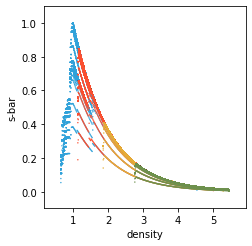

In [1105]:
%%capture --no-stdout --no-display

nplots=4
plots = [
    plot_s_bar_rho(int(i))
    for i in np.linspace(0, nt_t*2, nplots)
]

hv.Overlay(plots)#.cols(2)

:Layout
   .Overlay.I   :Overlay
      .Points.I :Points   [x,y]
      .VLine.I  :VLine   [x,y]
   .Curve.I     :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Points.I :Points   [x,y]
      .VLine.I  :VLine   [x,y]
   .Curve.II    :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Points.I :Points   [x,y]
      .VLine.I  :VLine   [x,y]
   .Curve.III   :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Points.I :Points   [x,y]
      .VLine.I  :VLine   [x,y]
   .Curve.IV    :Curve   [x]   (y)
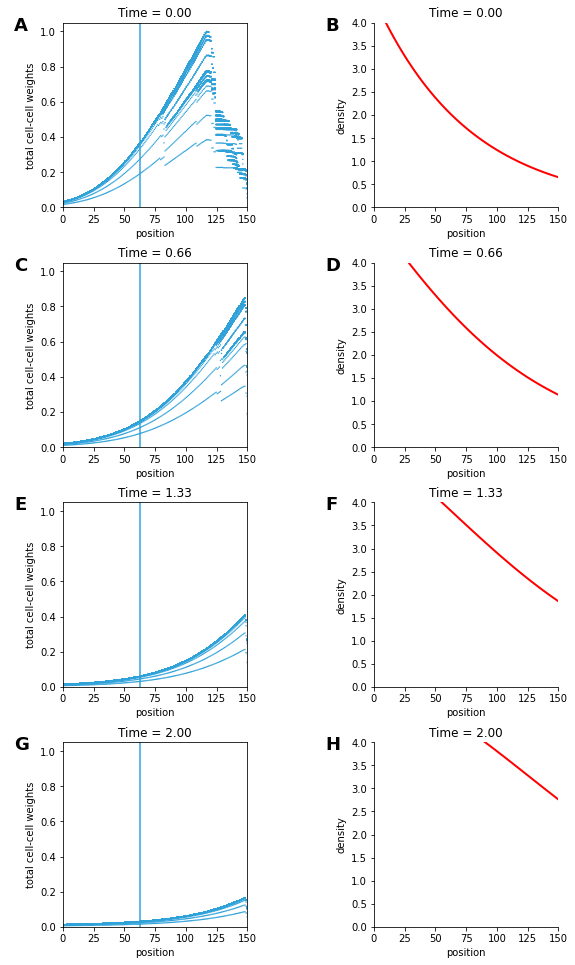

In [1106]:
%%capture --no-stdout --no-display

nplots=4
plots = [
    plot_s_bar(int(i)) * hv.VLine(0.42 * y_k) + plot_rho(int(i)) 
    for i in np.linspace(0, nt_t*2, nplots)
]

hv.Layout(plots).cols(2)

### Simulating signaling under a density gradient

Now we will use our DDE solver to calculate the model-predicted fluorescence under these conditions.

We randomly assign 1% of cells to be sender cells to mimic the 1:100 sender:transceiver co-culture. We fix the random seed for reproducibility, but one can repeat this process with different seeds to show that the gross behavior is minimally affected.

__Set sender cell location__

In [1107]:
# Specify percent of population that is sender
pct_s = 1
n_s = int(n * (pct_s/100)) + 1

# Set seed
np.random.seed(seed)

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

__Get RHS of signaling DDE__

In [1108]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, sender_idx, beta_func, beta_args,)

Transceivers are initialized at zero-state initial conditions, and senders are fixed at a fluorescence of `1` (by definition). 

Since our parameter `L` (pairwise contact area) varies over time, we use the `lsig.integrate_DDE_varargs` solver, short for "variable argument(s)."

In [1109]:
# new_args = [
#     1,
#     0.03,
#     4,
#     1,     # delta
#     1e-5,
#     1,
#     1,
# ]

# delta = new_args[3]

In [1110]:
new_args = [
    1,
    0.02,
    4,
    3,     # delta
    1e-5,
    1,
    1,
]

delta = new_args[3]

In [1111]:
# Set initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

# Perform integration (method of steps)
S_t = lsig.integrate_DDE_varargs(    
    t,
    rhs,
    var_vals=W_t,
    dde_args=(*new_args, W_t[0]),
    E0=S0,
    delay=delay,
    progress_bar=True,
    min_delay=5,
    where_vars=7,
)

100%|██████████| 400/400 [00:02<00:00, 170.12it/s]


#### Visualizing a simulated kinematic wave

In order to mimic the appearance of the experiment, we construct a mask of cells inside a circle, similar to the circular culture well.

In [1112]:
# Make mask of cells inside circle
X_dists = np.linalg.norm(X - np.array([0, y_k/2]), axis=1)
X_mask = np.array([d <= y_k/2 for d in X_dists])

# Set fluorescence to zero outside circle
S_t_cir = S_t.copy()
for i in range(nt):
    S_t_cir[i, ~X_mask] = 0

We would like to construct a Voronoi mesh and color each cell with its fluorescence value. However, this is not practical for rendering tens to hundreds of thousands of cells per frame. Instead, we will treat each cell centroid as a point in a `ColorMesh` object and use `matplotlib` to render a continuous, interpolated heatmap.

Below, we render a few example frames using `lsig.inspect_out()`. See bottom of notebook for code used to produce video [ref].

In [1113]:
# Get plotting window
xlim = -y_k/2, y_k/2
ylim = 0, y_k

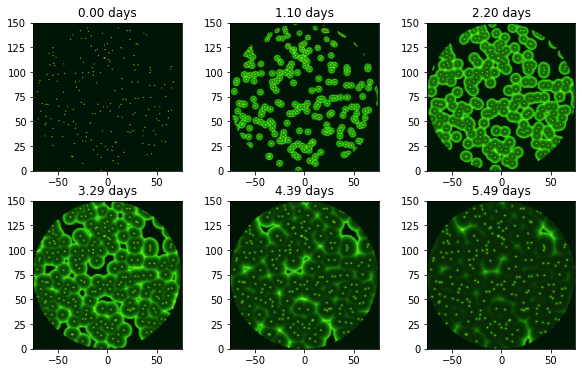

In [1114]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 3

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"{t_to_days(t)[i]:.2f} days"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t_cir, 
        idx=i,
        vmin=0, 
        vmax=0.3, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
    )

In [1115]:
print(delta, rho_bar, ks, )

3 2 3


#### Quantifying transceiver fluorescence

To understand the simulated transceiver behavior quantitatively, we divide the y-axis into `nbins` bins and sample the time-series at `nt_sample` time-points.

In [1085]:
# Set number of bins and time-points
nbins = 12
nt_sample = 6

# Sample y-bins and time-points
y_bins = np.linspace(0, y_k, nbins + 1)
t_samples = (np.linspace(0, 4, nt_sample) * nt_t).astype(int)

Experimentally, the sender cell type does not fluoresce strongly in the GFP channel. In order to better compare the *in silico* results to *in vitro*, we sample expression of only the transceiver cells by constructing a mask

In [1086]:
# Transceiver mask
tc_mask = np.ones(n, dtype=bool)
tc_mask[sender_idx] = False

# Make bins for histogram
tc_hist = np.digitize(X[tc_mask, 1], bins = y_bins)

# Sample transceiver fluroescence
S_t_samp_tc = S_t[t_samples][:, tc_mask]

Then we calculate mean fluorescence, normalized to the maximum fluorescence at that time-point.

In [1087]:
# Get fluor in bins
tc_fluor_t_bins = np.zeros((t_samples.size, nbins))
for b in range(nbins):
    tc_fluor_t_bins[:, b] = S_t_samp_tc[:, tc_hist == (b + 1)].mean(axis=1)

# Normalize
tc_normfluor_t_bins = lsig.normalize(
    tc_fluor_t_bins, 
    tc_fluor_t_bins.min(axis=1)[:, np.newaxis], 
    tc_fluor_t_bins.max(axis=1)[:, np.newaxis],
)
# (tc_fluor_t_bins - tc_fluor_t_bins.min()) / tc_fluor_t_bins.max(axis=1)[:, np.newaxis]
tc_normfluor_t_bins = np.nan_to_num(tc_normfluor_t_bins)


Finally, we convert to DataFrame and plot a curve of normalized fluorescence over y-position at sampled time-points.

In [1088]:
# Make DataFraem
normdata = pd.DataFrame(
    tc_normfluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t_to_days(t)[t_samples],
).reset_index().melt(id_vars="index")
normdata.columns = ["time (days)", "position", "normalized mean fluorescence"]

:NdOverlay   [time (days)]
   :Curve   [position]   (normalized mean fluorescence,time (days))
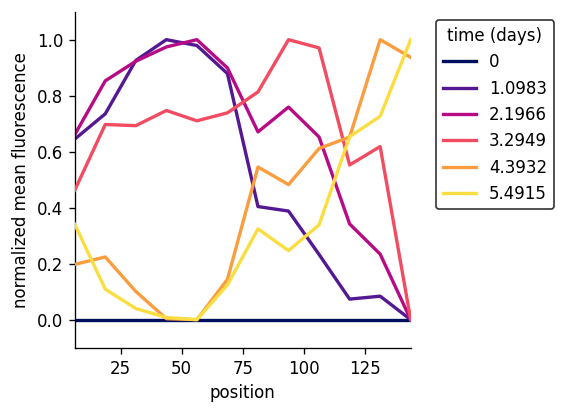

In [1089]:
%%capture --no-stdout --no-display

# make color cycle
cycle = lsig.sample_cycle(cc.linear_bmy_10_95_c71[:-20], nt_sample)

# Plot
p1 = hv.Curve(
    data=normdata,
    kdims=["position"],
    vdims=["normalized mean fluorescence", "time (days)"],
).groupby(
   "time (days)"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(p1, dpi=120)

For comparison, we also show the unnormalized mean fluorescence in each bin.

In [1007]:
# Make DataFraem
unnormdata = pd.DataFrame(
    tc_fluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t_to_days(t)[t_samples],
).reset_index().melt(id_vars="index")
unnormdata.columns = ["time (days)", "position", "fluorescence"]

:NdOverlay   [time (days)]
   :Curve   [position]   (fluorescence,time (days))
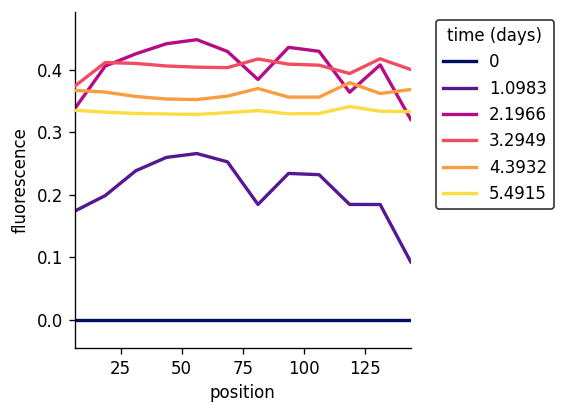

In [1008]:
%%capture --no-stdout --no-display

# make color cycle
cycle = lsig.sample_cycle(cc.linear_bmy_10_95_c71[:-20], nt_sample)

# Plot
p2 = hv.Curve(
    data=unnormdata,
    kdims=["position"],
    vdims=["fluorescence", "time (days)"],
).groupby(
    "time (days)"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(p2, dpi=120)

<hr>

In [862]:
import os

### Save video

In [810]:
# Set directory
dir_name = "plots"

# Set filename
vid_fname = "20210322_density_gradient_delta_{0:.1f}_rhobar_{1:.1f}_ks_{2}_{1:.1f}pctsender".format(
    delta, rho_bar, ks, pct_s
)

In [811]:
# Function for plot title
title_fun = lambda i: f"Time = {t[i]:.2f}"

Writing to: plots\20210322_density_gradient_delta_3.0_rhobar_1.0_ks_3_1.0pctsender


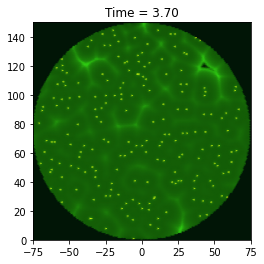

In [812]:
lsig.animate_colormesh(
    X_arr=X,
    rows=rows,
    cols=cols,
    var_t=S_t_cir,
    n_frames=75,
    file_name=vid_fname,
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
)

#### Save plot

In [263]:
# Set directory
dir_name = "plots"

# Set filename
p1_fname = "{0}_density_gradient_plot_{1:.1f}pctsender".format(
    trial_name, pct_s
)

# Set format
fmt='png'

In [59]:
%%capture --no-display

p1_path = os.path.join(dir_name, p1_fname)
hv.save(p1, p1_path, fmt=fmt)

<hr>

In [60]:
%load_ext watermark

In [61]:
%watermark -v -p numpy,scipy,numba,holoviews,jupyterlab

CPython 3.7.7
IPython 7.18.1

numpy 1.18.1
scipy 1.4.1
numba 0.51.2
holoviews 1.13.2
jupyterlab 1.2.6
